<h1 align='center'>Animal and cars recognition (CIFAR 10)</h1>

Patryk Kośmider s16863 i Krzysztof Marek s16663

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras import models

Ładujemy dataset używając Kerasa

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

Potrzebujemy tablicy jednowymiarowej zamiast tablic w tablicy

In [7]:
y_train = y_train.reshape(-1,)

In [8]:
y_test = y_test.reshape(-1,)

Klasy

In [9]:
classes = [ 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' ]

Funkcja do wyświetlania obrazka

In [10]:
def show_image(X, y, index):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[index], interpolation = 'nearest')
    plt.xlabel(classes[y[index]])

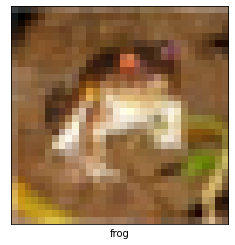

In [11]:
show_image(X_train, y_train, 0)

Normalizacja danych treningowych. Mimo, że operacje na zmiennach całkowitych są szybsze to jednak mniej dokładne. Lepsze wyniki osiągane są na zmiennach zmiennoprzecinkowych.

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Tworzymy model `Convolutional neural network`

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    # ~74% accuracy, 8s per epoch, 5ms per step
    # ~62% evaluation accuracy
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    # ~77% accuracy, 12s per epoch, 8ms per step
    # ~68% evaluation accuracy

    layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    # ~82% accuracy, 14s per epoch, 9ms per step
    # ~73% evaluation accuracy
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

Kompilujemy nasz model. Używamy `sparse_categorical_crossentropy` gdyż wynik końcowy jest indeksem konkretnej klasy, pojedynczą wartością.

In [14]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = [ 'accuracy' ])

Trenujemy nasz model

In [15]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7245 - accuracy: 0.3603
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1415 - accuracy: 0.5934
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9514 - accuracy: 0.6687
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8381 - accuracy: 0.7100
Epoch 5/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7471 - accuracy: 0.7407
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6809 - accuracy: 0.7610
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6280 - accuracy: 0.7800
Epoch 8/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.5819 - accuracy: 0.7964
Epoch 9/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.5276 - accuracy: 0.8150
Epoch 10/10
1563/1563 [==============================] - 18s 12ms

Sprawdzamy jakość treningu

In [16]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8400 - accuracy: 0.7259


[0.8399602770805359, 0.7258999943733215]

Dokonujemy predykcji

In [17]:
y_pred = cnn.predict(X_test)

Wybieramy najbardziej prawdobodobną klasę obiektu

In [18]:
y_classes = [ np.argmax(element) for element in y_pred ]

'truck'

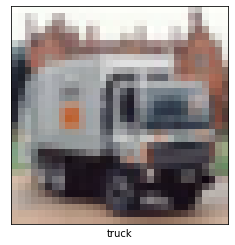

In [19]:
i = 11
show_image(X_test, y_test, i)
classes[y_classes[i]]